In [ ]:
!pip install skillsnetwork

Using voice data to detect Parkinsons Disease

In [ ]:
#Libraries
!pip install seaborn
!pip install scikit-learn
!pip install dtreeviz
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Voice Dataset:


In [ ]:
import skillsnetwork
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
def warn(*args, **kwargs): pass
import warnings
warnings.warn = warn
warnings.filterwarnings("ignore")

#Helper Functions:


In [ ]:
sns.set(style="whitegrid",color_codes=True)
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
parkinsons = fetch_ucirepo(id=174)

# data (as pandas dataframes)
X = parkinsons.data.features
y = parkinsons.data.targets

# metadata
print(parkinsons.metadata)

# variable information
print(parkinsons.variables)


{'uci_id': 174, 'name': 'Parkinsons', 'repository_url': 'https://archive.ics.uci.edu/dataset/174/parkinsons', 'data_url': 'https://archive.ics.uci.edu/static/public/174/data.csv', 'abstract': "Oxford Parkinson's Disease Detection Dataset", 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 197, 'num_features': 22, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['status'], 'index_col': ['name'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2007, 'last_updated': 'Wed Feb 14 2024', 'dataset_doi': '10.24432/C59C74', 'creators': ['Max Little'], 'intro_paper': {'ID': 385, 'type': 'NATIVE', 'title': 'Exploiting Nonlinear Recurrence and Fractal Scaling Properties for Voice Disorder Detection', 'authors': 'Max A. Little, P. McSharry, S. Roberts, D. Costello, I. Moroz', 'venue': 'BioMedical Engineering OnLine', 'year': 2007, 'journal': None, 'DOI': '10.1186/1475-925X-6-23', 'URL

In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Datasets/parkinsons/parkinsons.data', sep=',', index_col='name') # assign index column to name

data.head()


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
name,,,,,,,,,,,,,,,,,,,,,
phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
data.shape


(195, 23)

<Axes: >

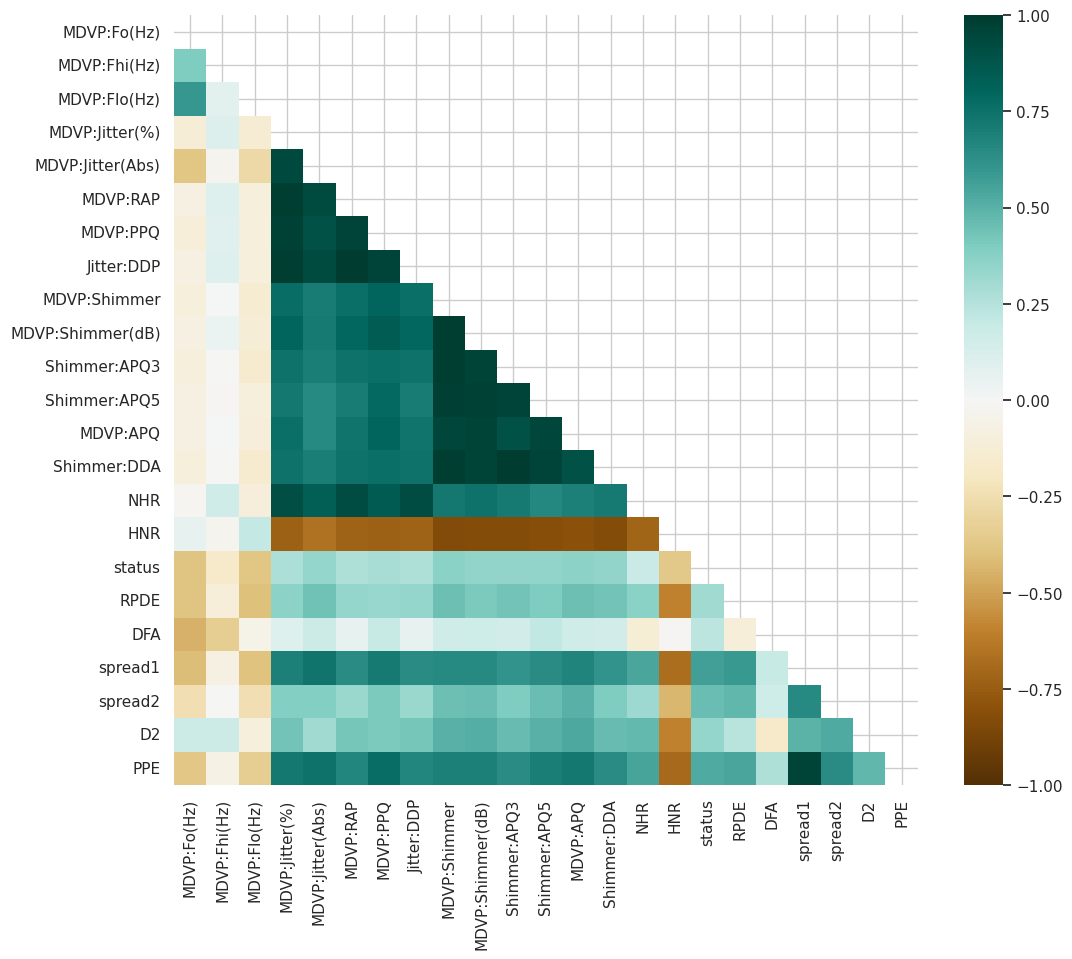

In [ ]:
# creating the correlation matrix
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
sns.heatmap(data.corr(),vmin=-1, vmax=1,cmap='BrBG', mask=mask)

Text(0.5, 1.0, 'Features Correlating with Parkinson existance')

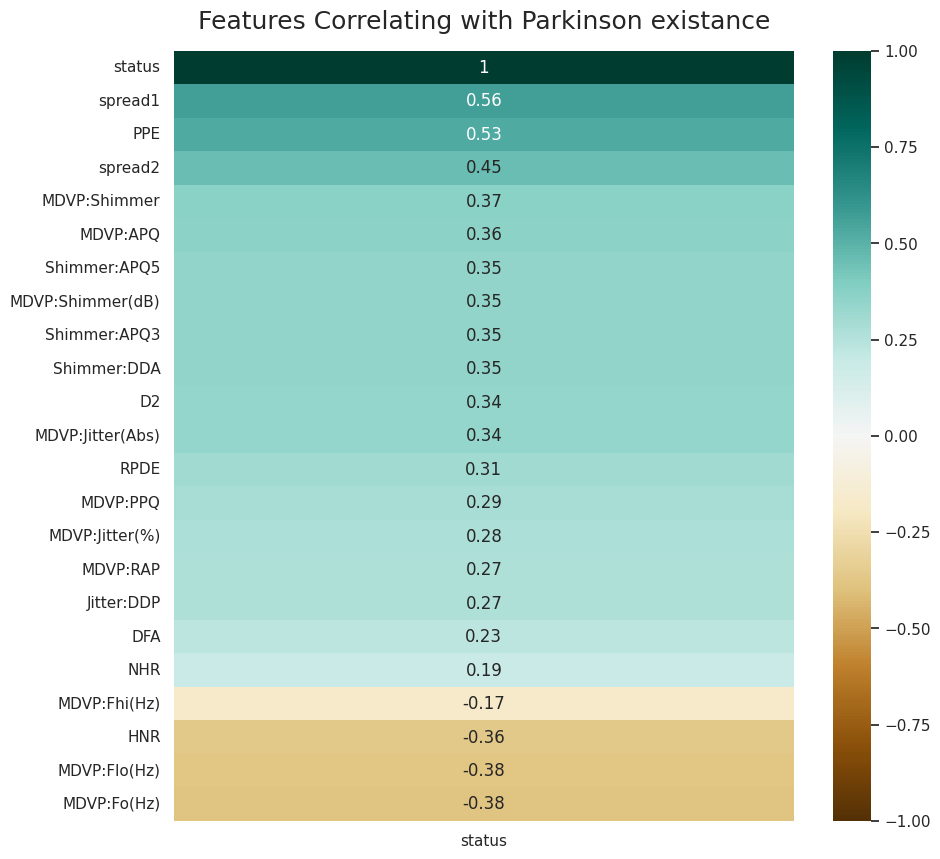

In [ ]:
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(data.corr()[['status']].sort_values(by='status', ascending=False),
                      vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Parkinson existance',
                  fontdict={'fontsize':18}, pad=16)


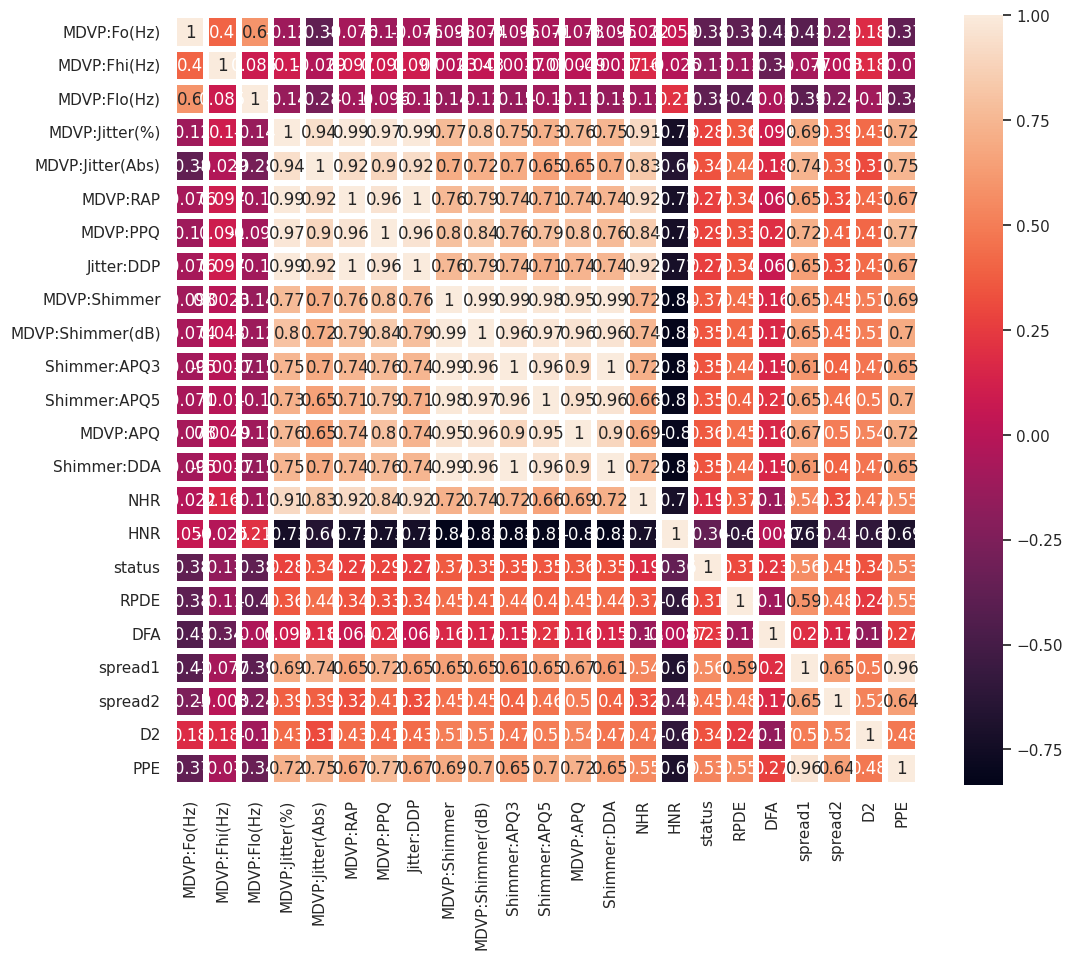

In [ ]:
corr_matrix=data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, linewidths=4)
plt.show()

In [ ]:
X= data.drop(['status'], axis=1)
y= data['status']

In [ ]:
y.value_counts(normalize=True)

,proportion
status,
1,0.753846
0,0.246154


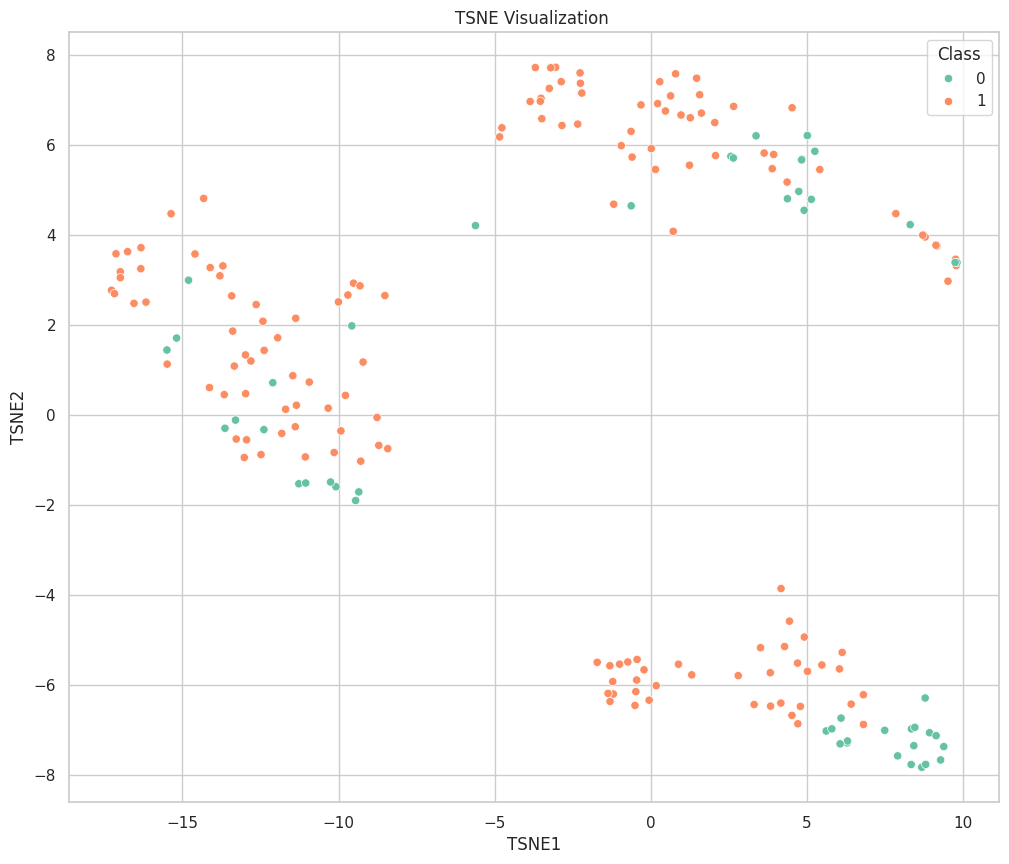

In [ ]:
import seaborn as sns
from sklearn.manifold import TSNE
tsne =TSNE(n_components=2, random_state=42)
X_tsne=tsne.fit_transform(X)
#DF
tsne_df =pd.DataFrame(data=X_tsne, columns=['TSNE1','TSNE2'])
tsne_df['Class']=y.values
#Visualize Data
plt.figure(figsize=(12,10))
sns.scatterplot(data=tsne_df,x='TSNE1',y='TSNE2',hue='Class',palette='Set2')
plt.title('TSNE Visualization ')
plt.show()

#Data Preparation:


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=11
                                               )
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (136, 22)
X_test (59, 22)
y_train (136,)
y_test (59,)


#Using KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
y_pred[0:10]
knn.predict_proba(X_test)[0:10]

array([[0.33333333, 0.66666667],
       [0.66666667, 0.33333333],
       [0.33333333, 0.66666667],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ]])

Confusion matrix, without normalization
[[ 9  3]
 [ 5 42]]


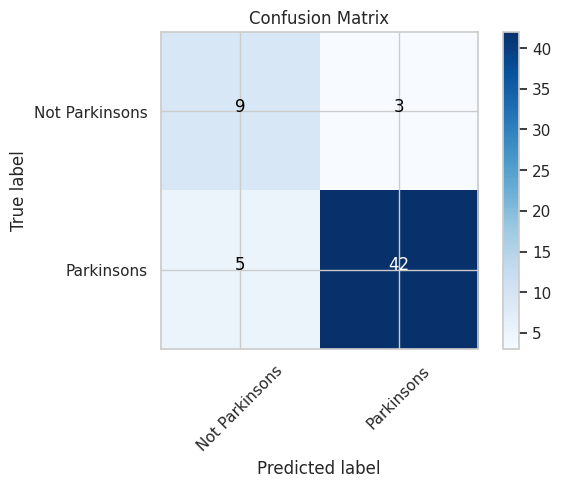

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
plot_confusion_matrix(confusion_matrix(y_test,y_pred),classes=['Not Parkinsons','Parkinsons'],title="Confusion Matrix")

In [ ]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.75      0.69        12
           1       0.93      0.89      0.91        47

    accuracy                           0.86        59
   macro avg       0.79      0.82      0.80        59
weighted avg       0.87      0.86      0.87        59


Accuracy Score: 0.864406779661017


#GridSearch CV

In [ ]:
param_grid ={
    'n_neighbors':[3,5,7,9]
}

In [ ]:
knn =KNeighborsClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(knn,param_grid,scoring='recall',cv=5)
grid_search


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9]}, scoring='recall')

In [ ]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9]}, scoring='recall')

In [ ]:
print("Best Parameters: ",grid_search.best_params_  )
print("Best Score: ",grid_search.best_score_)

Best Parameters:  {'n_neighbors': 9}
Best Score:  0.97


In [ ]:
y_pred =grid_search.best_estimator_.predict(X_test)

In [ ]:
from sklearn.metrics import recall_score
recall=recall_score(y_test,y_pred)
recall

0.9148936170212766

In [ ]:
knn =KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_hat=knn.predict(X)

Confusion matrix, without normalization
[[ 31  17]
 [  5 142]]


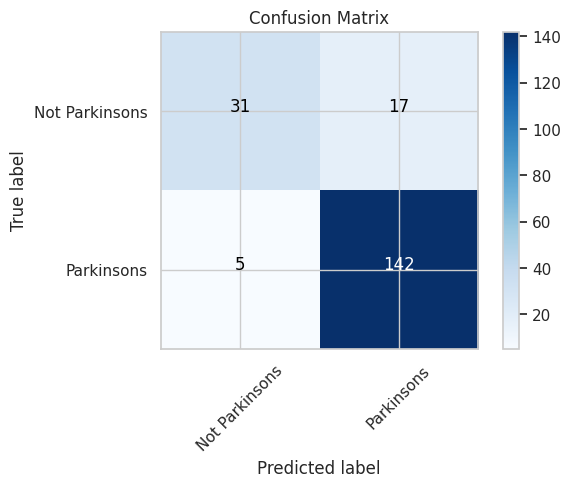

In [ ]:
plot_confusion_matrix(confusion_matrix(y,y_hat),classes=['Not Parkinsons','Parkinsons'],title="Confusion Matrix")

In [ ]:
#Find TP(True Positives)
tsne_df['label'] =''
tsne_df['label'].iloc[np.where((y_hat==1)&(y==1))] ="TP"
#Find False Negatives
tsne_df['label'].iloc[np.where((y_hat==0)&(y==1))] ="FN"
#Find False Positives
tsne_df['label'].iloc[np.where((y_hat==1)&(y==0))] ="FP"
#Find True Negatives
tsne_df['label'].iloc[np.where((y_hat==0)&(y==0))] ="TN"
tsne_df['label'].value_counts()

,count
label,
TP,142
TN,31
FP,17
FN,5


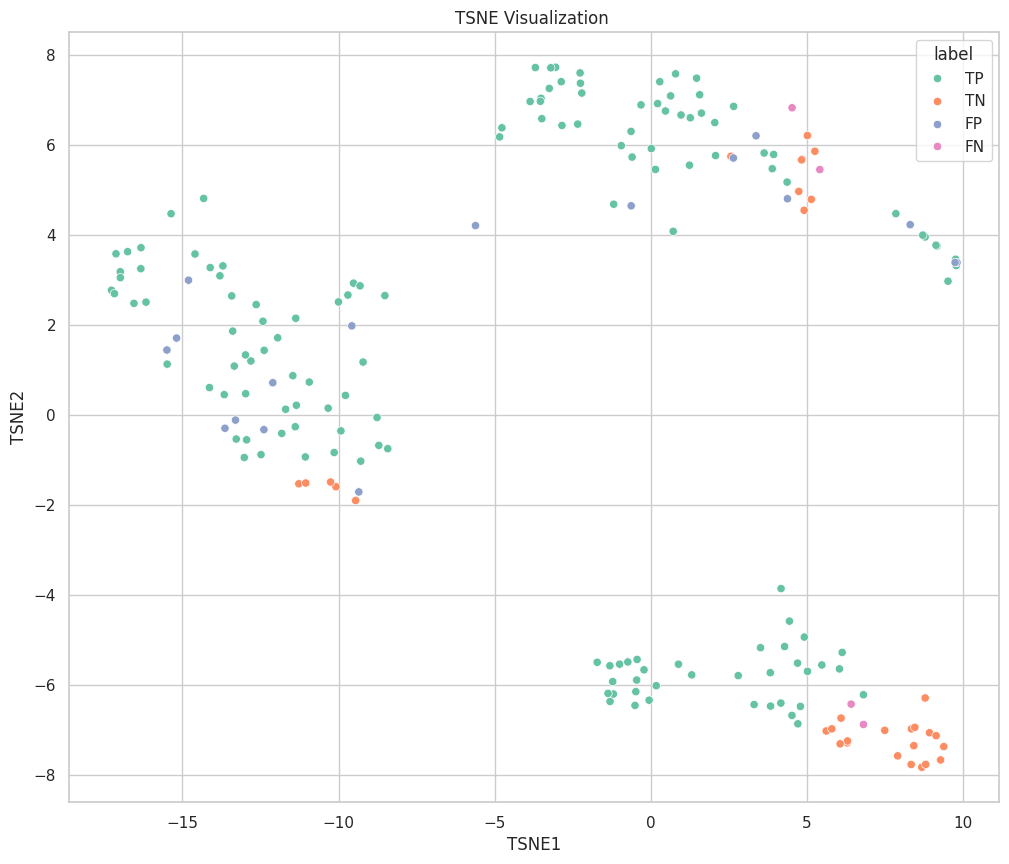

In [ ]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=tsne_df,x='TSNE1',y='TSNE2',hue='label',palette='Set2')
plt.title('TSNE Visualization ')
plt.show()

#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(LogisticRegression(),param_grid,scoring='recall',cv=5)
grid_search

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'n_neighbors': [3, 5, 7, 9]}, scoring='recall')

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(LogisticRegression(solver='liblinear'),param_grid_lr,scoring='recall',cv=5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='recall')

In [ ]:
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)


Best Parameters:  {'C': 0.001, 'penalty': 'l1'}
Best Score:  1.0


In [ ]:

y_pred = grid_search.best_estimator_.predict(X_test)



In [ ]:

from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)

recall


1.0

In [ ]:
from sklearn.metrics import classification_report

print("\nClassification Report for Logistic Regression:\n", classification_report(y_test, y_pred))


Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.80      1.00      0.89        47

    accuracy                           0.80        59
   macro avg       0.40      0.50      0.44        59
weighted avg       0.63      0.80      0.71        59



In [ ]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred =lr.predict(X_test)
y_pred[0:10]

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 0])

In [ ]:
lr.predict_proba(X_test)[0:10]

array([[0.268048  , 0.731952  ],
       [0.69148409, 0.30851591],
       [0.06768054, 0.93231946],
       [0.38580919, 0.61419081],
       [0.07225517, 0.92774483],
       [0.2628088 , 0.7371912 ],
       [0.00914564, 0.99085436],
       [0.51050786, 0.48949214],
       [0.85877255, 0.14122745],
       [0.90257223, 0.09742777]])

Confusion matrix, without normalization
[[ 9  3]
 [ 6 41]]

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.75      0.67        12
           1       0.93      0.87      0.90        47

    accuracy                           0.85        59
   macro avg       0.77      0.81      0.78        59
weighted avg       0.86      0.85      0.85        59


Accuracy Score: 0.847457627118644


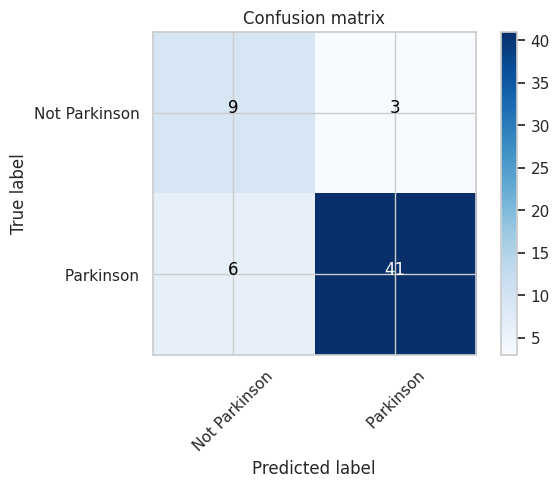

In [ ]:

plot_confusion_matrix(confusion_matrix(y_test, y_pred),classes=[ "Not Parkinson", " Parkinson"],title='Confusion matrix')
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

In [ ]:
coef=abs(lr.coef_ [0])

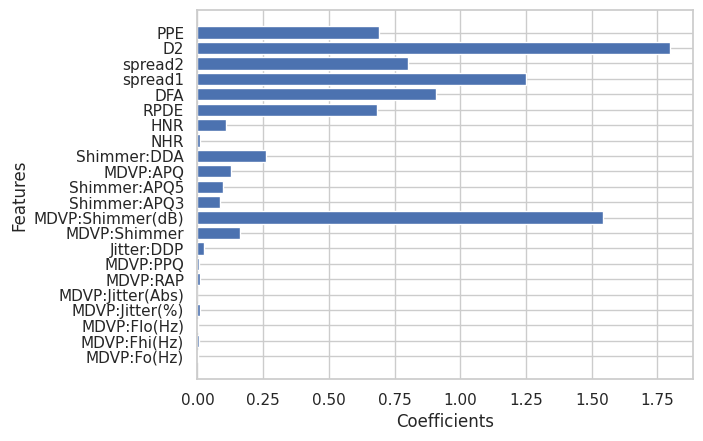

In [ ]:
plt.barh(X.columns,coef)
plt.xlabel("Coefficients")
plt.ylabel("Features")
plt.show()

In [ ]:
best_columns =X.columns[np.argsort(-1*coef)[0:5]]
best_columns

Index(['D2', 'MDVP:Shimmer(dB)', 'spread1', 'DFA', 'spread2'], dtype='object')

Confusion matrix, without normalization
[[ 9  3]
 [ 6 41]]

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.75      0.67        12
           1       0.93      0.87      0.90        47

    accuracy                           0.85        59
   macro avg       0.77      0.81      0.78        59
weighted avg       0.86      0.85      0.85        59


Accuracy Score: 0.847457627118644


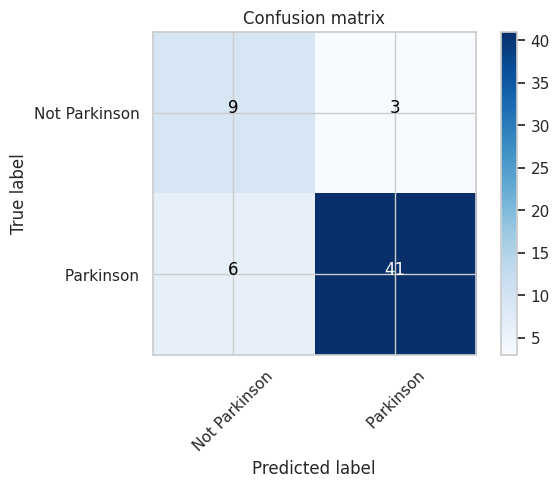

In [ ]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train[best_columns], y_train)
y_pred_proba = log_reg.predict(X_test[best_columns])
plot_confusion_matrix(confusion_matrix(y_test, y_pred),classes=[ "Not Parkinson", " Parkinson"],title='Confusion matrix')
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Confusion matrix, without normalization
[[ 4  8]
 [ 2 45]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.33      0.44        12
           1       0.85      0.96      0.90        47

    accuracy                           0.83        59
   macro avg       0.76      0.65      0.67        59
weighted avg       0.81      0.83      0.81        59


Accuracy Score: 0.8305084745762712


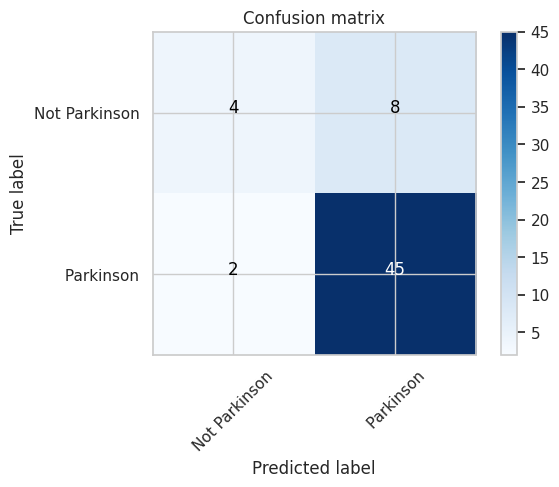

In [ ]:
from sklearn.svm import SVC

# Train the SVM classifier
svm = SVC()
svm.fit(X_train, y_train)

# Make predictions on the test set
y_hat = svm.predict(X_test)

# confusion_matri
plot_confusion_matrix(confusion_matrix(y_test, y_hat),classes=[ "Not Parkinson", " Parkinson"],title='Confusion matrix')
print("\nClassification Report:\n", classification_report(y_test, y_hat))
print("\nAccuracy Score:", accuracy_score(y_test, y_hat))